In [1]:
%pylab inline
#importa os packages numpy e matplotlib que permitem trabalhar com imagens e gráficos

Populating the interactive namespace from numpy and matplotlib


In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 705F-F162

 Directory of C:\Users\mirre\Desktop\Miguel\Engenharia Biom‚dica\4§ Ano\1§ Semestre\Processamento de Imagem\Exerc¡cios\TPC1

24/10/2017  17:42    <DIR>          .
24/10/2017  17:42    <DIR>          ..
28/09/2017  13:08             6ÿ148 .DS_Store
29/09/2017  20:24    <DIR>          .ipynb_checkpoints
24/10/2017  17:42    <DIR>          1st_manual
29/09/2017  20:24            89ÿ132 Beat Frequencies.ipynb
22/10/2017  20:48           652ÿ817 Exerc¡cio dos olhos (TPC1).ipynb
16/10/2017  16:08           535ÿ608 Image Processing.ipynb
24/10/2017  17:42    <DIR>          images
24/10/2017  17:42    <DIR>          mask
16/10/2017  15:55             3ÿ092 TPC_1.ipynb
               5 File(s)      1ÿ286ÿ797 bytes
               6 Dir(s)  525ÿ149ÿ638ÿ656 bytes free


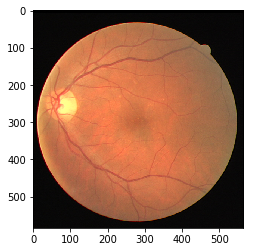

In [3]:
imagem = imread('images/21_training.tif')
imshow(imagem)
#leitura e visualização da imagem .tif é o tipo de ficheiro
#Out apenas dá a saída do último comando

In [4]:
#temos de verificar quantos canais tem a imagem
imagem.shape
#obtenho por ordem: y, x 'tamanho da imagem' e número de canais

(584, 565, 3)

# Visualização de todos os canais (RGB)

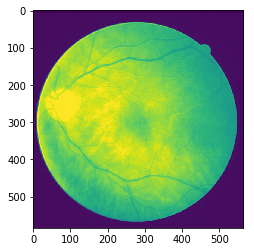

In [5]:
#para calcular o histograma não posso calcular uma imagem a cores, tenho de escolher os 3 canais RGB individualmente
imshow(imagem[:,:,0])
#canal R = red

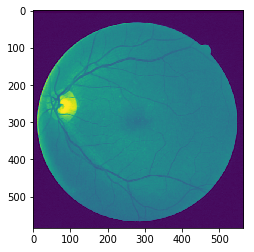

In [6]:
imshow(imagem[:,:,1])
#canal G = green

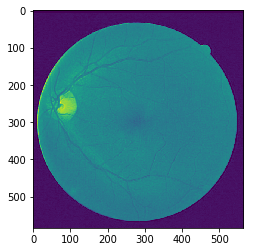

In [7]:
imshow(imagem[:,:,2])
#canal B = blue

# 1. Histograma da imagem do fundo do olho

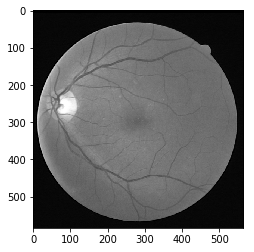

In [8]:
#só temos de trabalhar no canal verde
imagem_green = imagem[:,:,1]
imshow(imagem_green)
gray() #muda a imagem para a paleta de cinzentos

In [9]:
numero_cinzentos = 256 #estou a definir o leque de cinzentos, que no programa vai de 0 a 255
contagem = zeros(numero_cinzentos) #criação de uma lista para os diferentes tons de cinzento que irá fazer a contagem para cada um deles
for i in range(imagem_green.shape[0]): #shape'0' = número de pontos no eixo do y, aparece na horizontal
    for j in range(imagem_green.shape[1]): #shape'1' = número de pontos no eixo do x, aparece na vertical, se fosse shape'2' = número de canais, que eram 3
        contagem[imagem_green[i,j]] = contagem[imagem_green[i,j]] + 1 #entre parênteses retos, SEMPRE, para dar o valor, tom de cinza 

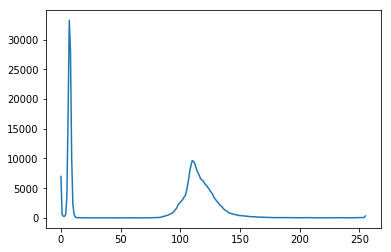

In [10]:
plot(contagem) #histograma do canal verde, primeiramente transformado em tons de cinza

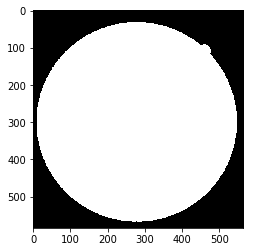

In [11]:
mascara = imread('mask/21_training_mask.gif') #carregamento de uma máscara da mesma imagem
imshow(mascara)

In [12]:
[id_retina_y,id_retina_x] = nonzero(mascara > 0) #cria uma lista com os índices/coordenadas dos pontos > 0 - 'não pretos'

In [13]:
retina = imagem_green[id_retina_y,id_retina_x]

In [14]:
numero_cinzentos = 256
contagem_retina = zeros(numero_cinzentos) 
for i in retina: #vai buscar os valores dentro da retina
    contagem_retina[i] = contagem_retina[i] + 1 #apenas uma variável porque retina.shape = apenas 1 valor

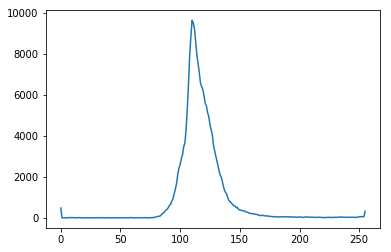

In [15]:
plot(contagem_retina)

##### :. Após o cálculo da função que permite a visualização do histograma concluímos que, comparativamente ao histograma da imagem orignal, houve a eliminação do pico mais alto apresentado no histograma, devido à eliminação do fundo da imagem, pixels/pontos com índices baixos, perto do 0, tendo ficado apenas com um pico. Neste caso, o pico, do histograma acima visto, equivale ao segundo pico, do histograma original, uma vez que correspondem ambos ao fundo do olho, são iguais em tons de cinzento e respetiva quantidade.

# 2. Histograma da imagem dos vasos da retina

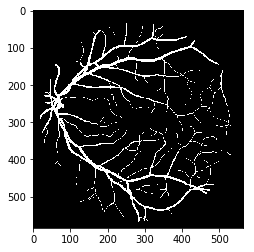

In [16]:
mascara2 = imread('1st_manual/21_manual1.gif') #carregamento da imagem dos vasos
imshow(mascara2) #visualização da imagem dos vasos

In [17]:
mascara2.shape #verificação do número de canais existentes na imagem
#se não aparecer nada na terceira coluna, então a imagem apenas tem preto e branco

(584, 565)

In [18]:
[id_vasos_y,id_vasos_x] = nonzero(mascara2 > 0) #cria uma lista com os índices/coordenadas dos pontos > 0 - 'não pretos'

In [19]:
vasos = imagem_green[id_vasos_y,id_vasos_x]

In [20]:
numero_cinzentos = 256
contagem_vasos = zeros(numero_cinzentos) 
for i in vasos: #vai buscar os valores dentro da retina
    contagem_vasos[i] = contagem_vasos[i] + 1 #apenas uma variável porque retina.shape = apenas 1 valor

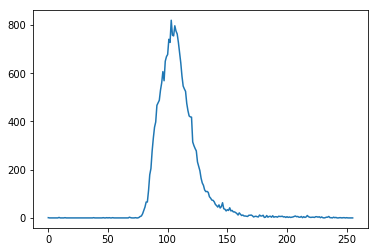

In [21]:
plot(contagem_vasos)

##### :. Depois da seleção dos tons de cinza e respetivo histograma, representando os vasos sanguíneos,e comparativamente ao histograma da imagem orignal, houve também uma eliminação do pico mais elevado, correspondente ao rebordo da imagem da retina. No entanto, neste histograma o ponto mais alto está na ordem dos 800, isto porque, os vasos ocupam uma pequena parte da imagem total, tendo assim pontos pixels a ser preenchidos na sua totalidade. Reparamos que a maioria dos tons cinza encontra-se entre 80 e 170, aproximadamente, o que se aproxima um pouco dos tons de cinza ocorridos no histograma original.

# 3. Histograma da imagem do fundo da retina

In [22]:
nova_mascara = mascara - mascara2 #criação de uma mascara através da subtração da máscara do fundo do olho e dos vasos
#possível fazer esta subtração porque estamos a tratar de duas máscaras apenas a preto e branco, se tiveres cor não funciona

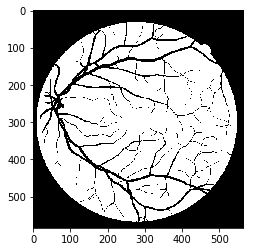

In [23]:
imshow(nova_mascara)

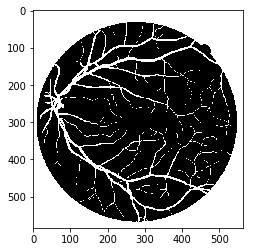

In [24]:
imshow(invert(nova_mascara)) #curiosidade, inversão da imagem

In [25]:
[id_fundoretina_y,id_fundoretina_x] = nonzero(nova_mascara > 0)

In [26]:
fundo_olho = imagem_green[id_fundoretina_y,id_fundoretina_x]

In [27]:
numero_cinzentos = 256
contagem_fundo_olho = zeros(numero_cinzentos) 
for i in fundo_olho:
    contagem_fundo_olho[i] = contagem_fundo_olho[i] + 1

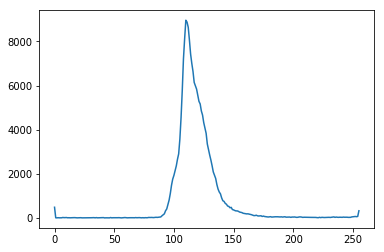

In [28]:
plot(contagem_fundo_olho)

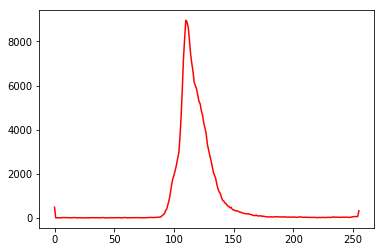

In [29]:
plot(contagem_fundo_olho,'r') #curiosidade, alteração da cor da linha do gráfico

##### :. No último exercícios, temos a apresentação do histograma do fundo da retina, sem o fundo do olho e sem os vasos. Com este histograma, assim como os os outros anteriores, o pico mais elevado desaparece juntamente com omissão do fundo da imagem. Relativamente ao nosso pico vemos que tem um formato idêntico e na mesma gama de tons de cinza que a nossa imagem, no entanto a quantidade de pixels diminui cerca de 800 pixels. Isto é um bom sinal, uma vez que a quantidade de pixels do histograma dos vasos, no seu ponto mais alto, ronda os 800, sendo uma espécie de subtração (não acontece realmente esta subtração) do histograma do fundo do olho e dos vasos, dado que, visto a olho, os valores estão todos a bater certo.

# 4. Alterar o brilho dos vasos da retina com interação

In [30]:
imagem_green[id_vasos_y,id_vasos_x].max()

250

In [31]:
imagem_green[id_vasos_y,id_vasos_x].min()

0

In [32]:
# Stdlib imports
from io import BytesIO

# Third-party libraries
from IPython.display import Image
from ipywidgets import interact, interactive, fixed
import matplotlib as mpl
from skimage import data, filters, io, img_as_float
import numpy as np

In [33]:
def arr2img(arr): #conversão de array to imagem, para obtermos imagens envés de termos arrays
    """Display a 2- or 3-d numpy array as an image."""
    if arr.ndim == 2:
        format, cmap = 'png', mpl.cm.gray
    elif arr.ndim == 3:
        format, cmap = 'jpg', None
    else:
        raise ValueError("Only 2- or 3-d arrays can be displayed as images.")
    # Don't let matplotlib autoscale the color range so we can control overall luminosity
    vmax = 255 if arr.dtype == 'uint8' else 1.0
    with BytesIO() as buffer:
        mpl.image.imsave(buffer, arr, format=format, cmap=cmap, vmin=0, vmax=vmax)
        out = buffer.getvalue()
    return Image(out)

In [34]:
def brilho_vasos(imagem, mascara, b):
    imagem_transformada = imagem.copy() #cópia da imagem do olho para alterar uma nova imagem e não modificar a imagem original
    for i in range(imagem_transformada.shape[0]): #buscar os valores em y
        for j in range(imagem_transformada.shape[1]): #buscar os valores em x
            if (mascara[i,j] > 0): #buscar os valores diferentes de 0 na máscara, ou seja, apenas buscar os pontos dos vasos
                imagem_transformada[i,j] = imagem_transformada[i,j] + b #fórmula do aumento/diminuição do brilho
                if (imagem_transformada[i,j] > 255):     #uma vez que a paleta de cinzas só vai desde 0 a 255, definimos que para
                    imagem_transformada[i,j] = 255       #pontos supeiores a 255, passam a valer 255 (valo máximo), o mesmo para
                elif (imagem_transformada[i,j] < 0):     #valores inferiores a 0
                    imagem_transformada[i,j] = 0
            else:
                imagem_transformada[i,j] = imagem_transformada[i,j]
    return (arr2img(imagem_transformada))

In [35]:
#criação de uma função interativa, brilho com imagem
interact(brilho_vasos, imagem = fixed(imagem_green), mascara = fixed(mascara2), b = 50) #fixed nas variáveis que não quisermos mexer

A Jupyter Widget

<function __main__.brilho_vasos>

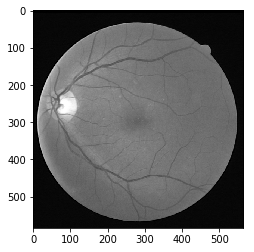

In [36]:
imshow(imagem_green) #confirmação de que não se alterou a imagem original

# 5. Alterar o contraste dos vasos da retina com interação

In [37]:
def contraste(imagem, mascara, contraste):
    imagem_contraste = imagem.copy() #para alterar uma nova imagem e nao alterar a imagem original
    [id_linha, id_coluna] = nonzero(mascara > 0) #valores diferentes de zero na mascara, ou seja, os pontos dos vasos
    angulo = contraste * (45/100) #converter o contraste de percentagem para graus
    alpha = angulo * (math.pi/180) # converter de graus para radianos
    h = 180.3 
    if (contraste < 0):
        b = -sin(alpha) * h
        m = ((127.5 - b) / 127.5)
    elif (contraste > 0):
        cat = int(sin(alpha) * h)
        x1 = 255 - cat
        m = (127.5) / (x1 - 127.5)
        b = (127.5 - m * 127.5)
    elif (contraste == 0):
        m = 1
        b = 0
    for i,j in zip(id_linha,id_coluna): #corre linha e coluna sem precisar de dois for
        if (imagem_contraste[i,j] < 0):
            imagem_contraste[i,j] = 0
        if (imagem_contraste[i,j] > 255):
            imagem_contraste[i,j] = 255
        else:
            imagem_contraste[i,j] = int((m * imagem[i,j]) + b)
    return arr2img(imagem_contraste)

In [38]:
interact(contraste, imagem = fixed(imagem_green), mascara = fixed(mascara2), contraste = (-100, 100, 10)) 

A Jupyter Widget

<function __main__.contraste>